In [158]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [159]:
df = pd.read_csv('results (44).csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (140,148,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,258,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,281,289) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [160]:
df

,optaEvent/id,optaEvent/eventId,optaEvent/typeId,optaEvent/periodId,optaEvent/timeMin,optaEvent/timeSec,optaEvent/contestantId,optaEvent/opContestantId,optaEvent/outcome,optaEvent/x,...,optaEvent/qualifier/7/opValue,optaEvent/qualifier/2/opValue,optaEvent/qualifier/18/id,optaEvent/qualifier/18/qualifierId,optaEvent/qualifier/18/value,optaEvent/qualifier/19/id,optaEvent/qualifier/19/qualifierId,optaEvent/qualifier/19/value,2sMarking/attInBox/6,optaEvent/qualifier/4/opValue
0,2.299466e+09,2.0,32.0,1.0,0.0,0.0,a2jg79bf9ab1vj6iok2r328cc,1131.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.299466e+09,2.0,32.0,1.0,0.0,0.0,77o8sorlijzpr0t4s7231zzxp,1581.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.299466e+09,3.0,1.0,1.0,0.0,1.0,a2jg79bf9ab1vj6iok2r328cc,1131.0,1.0,50.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,2.299495e+09,730.0,12.0,2.0,95.0,11.0,77o8sorlijzpr0t4s7231zzxp,1581.0,1.0,10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2974,2.299495e+09,1001.0,61.0,2.0,95.0,12.0,a2jg79bf9ab1vj6iok2r328cc,1131.0,1.0,87.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2975,2.299495e+09,731.0,5.0,2.0,95.0,13.0,77o8sorlijzpr0t4s7231zzxp,1581.0,1.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
df = df.loc[df['optaEvent/opContestantId']== 1131].reset_index()

In [162]:
df = df.loc[df['optaEvent/typeId']== 1.0]

In [163]:
df = df.loc[df['optaEvent/outcome']== 1]

In [164]:
df = df.loc[df['optaEvent/playerName']== 'J. Yueill']

In [165]:
df['optaEvent/x'] = df['optaEvent/x']*1.2
df['optaEvent/y'] = df['optaEvent/y']*0.8

In [166]:
df['2sMarking/endLoc/0'] = df['2sMarking/endLoc/0']*(50/52.5)
df['2sMarking/endLoc/1'] = df['2sMarking/endLoc/1']*(100/67)

In [167]:
df['2sMarking/endLoc/0'] = df['2sMarking/endLoc/0']+50
df['2sMarking/endLoc/1'] = df['2sMarking/endLoc/1']+50

In [168]:
df.get('2sMarking/endLoc/0')

2      33.161905
23     40.523810
42     62.219048
51     75.238095
54     55.161905
         ...    
930    45.190476
961    60.276190
974    54.961905
976    79.047619
992    76.933333
Name: 2sMarking/endLoc/0, Length: 77, dtype: float64

In [169]:
df['2sMarking/endLoc/0'] = df['2sMarking/endLoc/0']*1.2
df['2sMarking/endLoc/1'] = df['2sMarking/endLoc/1']*0.8

In [170]:
df['beginning'] = np.sqrt(np.square(120-df['optaEvent/x']) + np.square(40 - df['optaEvent/y']))
df['end'] = np.sqrt(np.square(120 - df['2sMarking/endLoc/0']) + np.square(40 - df['2sMarking/endLoc/1']))
##run the reset.index() now

In [172]:
df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]

In [173]:
df = df.loc[df['progressive']==True]

In [174]:
df

,level_0,index,optaEvent/id,optaEvent/eventId,optaEvent/typeId,optaEvent/periodId,optaEvent/timeMin,optaEvent/timeSec,optaEvent/contestantId,optaEvent/opContestantId,...,optaEvent/qualifier/18/qualifierId,optaEvent/qualifier/18/value,optaEvent/qualifier/19/id,optaEvent/qualifier/19/qualifierId,optaEvent/qualifier/19/value,2sMarking/attInBox/6,optaEvent/qualifier/4/opValue,beginning,end,progressive
31,392,1083,2.299478e+09,392.0,1.0,1.0,36.0,24.0,a2jg79bf9ab1vj6iok2r328cc,1131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.884030,14.103948,True
47,574,1615,2.299488e+09,572.0,1.0,2.0,51.0,31.0,a2jg79bf9ab1vj6iok2r328cc,1131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.263058,50.911073,True
75,976,2881,2.299495e+09,965.0,1.0,2.0,91.0,52.0,a2jg79bf9ab1vj6iok2r328cc,1131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.623725,31.912888,True


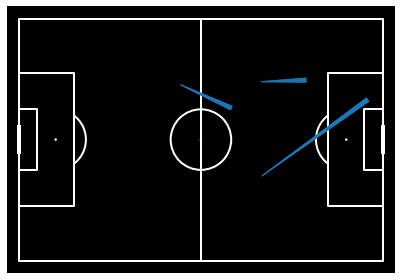

In [175]:
pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='black', line_color='white',
              constrained_layout=False, tight_layout=True)
fig,ax = pitch.draw()
plt.gca().invert_yaxis()

pitch.lines(df['optaEvent/x'],df['optaEvent/y'],df['2sMarking/endLoc/0'],df['2sMarking/endLoc/1'],comet=True,ax=ax)